In [1]:
import time, requests, os, json

In [2]:
from math import radians, cos, sin, asin, sqrt

In [3]:
import pandas as pd
from pandas import DataFrame, Series
from bs4 import BeautifulSoup
import matplotlib
import numpy as np
import sqlite3
%matplotlib inline

In [4]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    else:
        r = requests.get(url)
        data = r.text
        
        f = open(filename, "w", encoding="utf-8")
        f.write(data)
        f.close()
    

    return (str(filename) + " created!")

In [5]:
download('countries.json', "https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json")

'countries.json already exists!'

In [6]:
# convert countries.json into pandas database
countries = pd.read_json('countries.json')

In [7]:
# first five entries in countries database
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [8]:
# number of countries in countries database
len(countries)

174

In [9]:
# total area of all the countries in the database
countries['area'].sum()

127170843

In [10]:
download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')

'capitals.html already exists!'

In [11]:
# getting html from capitals.html
f = open("capitals.html", encoding="utf-8")
capitals_data = f.read()
f.close()

In [12]:
# using BeautifulSoup to get data into a usable format for python
soup = BeautifulSoup(capitals_data, 'html.parser')

In [13]:
capital_countries = []
full_data = []
rows = soup.find_all('tr') # finding all the places that have country data

# separate data by country and append to capital_countries
for row in rows:
    capital_countries.append(row.get_text())

# separate countries into their data
for row in capital_countries:
    nrows = row.splitlines()
    full_data.append(nrows[1:5])


In [14]:
capital_list = []
header = full_data[0] # header for the capitals
dt = full_data[1:] # data for capitals
countries_list = list(countries['country']) # list of countries
keys = header

# creating dict of capitals data to easier access individual categories for countries
for i in range(len(dt)): 
    capital_data = {}
    vals = dt[i]
    for i in range(len(keys)):
        capital_data[keys[i]] = vals[i]
    capital_list.append(capital_data)
    
capitals = []
# finding the countries in the capitals data that are also in the countries data
for c in capital_list:
    if c['Country Name'] in countries_list:
        capitals.append(c)


In [15]:
# writing capitals data to json file
with open('capitals.json', 'w') as f:
    json.dump(capitals, f)

In [16]:
# converting capitals json to pandas database
capitals = pd.read_json('capitals.json')

In [17]:
# first five countries in capitals database
capitals.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [18]:
# list of countries in capitals database
countries_in_capitals = []
for c in capitals['Country Name']:
    countries_in_capitals.append(c)
countries_in_capitals

['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [19]:
# finding the capital of Cuba
cuba_series = capitals[capitals['Country Name'] == 'Cuba']
next(iter(cuba_series['Capital Name']))

'Havana'

In [20]:
# finding the country with the capital Tbilisi
t_series = capitals[capitals['Capital Name'] == 'Tbilisi']
next(iter(t_series['Country Name']))

'Georgia'

In [21]:
# countries with the southern most capitals
southern_capitals = []
southern_most = capitals.sort_values(by='Capital Latitude')[0:7]
for c in southern_most['Country Name']:
    southern_capitals.append(c)
southern_capitals

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [22]:
# countries with the northern most capitals
northern_capitals = []
northern_most = capitals.sort_values(by='Capital Latitude', ascending = False)[0:5]
for c in northern_most['Country Name']:
    northern_capitals.append(c)
northern_capitals

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [23]:
# birth and death rate statistics for countries database
countries[['birth-rate', 'death-rate']].describe()

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [24]:
# phone and literacy statistics for countries database
# literacy and phone data in countries uses commas for some countries
# so I replaced the commas with periods and converted type to float
# so pandas could work with the data
literacy = countries['literacy'].str.replace(',','.').astype(float) 
phones = countries['phones'].str.replace(',','.').astype(float)
literacy_phones = pd.concat([literacy, phones], axis=1)
literacy_phones.describe()

,literacy,phones
count,174.000000,174.000000
mean,82.362069,215.770690
std,20.003166,218.713811
min,17.600000,1.300000
25%,70.100000,32.000000
50%,92.100000,140.350000
75%,98.000000,331.750000
max,100.000000,1035.600000


In [25]:
# largest landlocked country in Europe
landlocked = countries[countries['coastline'] == 0]
landlocked_europe = landlocked[landlocked['continent'] == 'Europe']
big_europe = landlocked_europe[landlocked_europe['area'] == landlocked_europe['area'].max()]
next(iter(big_europe['country']))

'Belarus'

In [26]:
# largest landlocked country in Asia
landlocked_asia = landlocked[landlocked['continent'] == 'Asia']
big_asia = landlocked_asia[landlocked_asia['area'] == landlocked_asia['area'].max()]
next(iter(big_asia['country']))

'Kazakhstan'

In [27]:
# most populated land locked country in Asia
populated_asia = landlocked_asia[landlocked_asia['population'] == landlocked_asia['population'].max()]
next(iter(populated_asia['country']))

'Afghanistan'

In [28]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 
    return c * r

In [29]:
# getting latitude and longitude for Japan
japan_series = capitals[capitals['Country Name'] == 'Japan']
japan_lat = next(iter(japan_series['Capital Latitude']))
japan_lon = next(iter(japan_series['Capital Longitude']))

In [30]:
# getting latitude and longitude for France
france_series = capitals[capitals['Country Name'] == 'France']
france_lat = next(iter(france_series['Capital Latitude']))
france_lon = next(iter(france_series['Capital Longitude']))

In [31]:
# distance from Japan to France
haversine(japan_lon, japan_lat, france_lon, france_lat)

6032.330932363535

In [32]:
gna_list = ['Guam', 'New Zealand', 'Australia']
df_list = []
dfs_list = []

# finding series for all countries in GNA
for c in gna_list:
    df_list.append(capitals[capitals['Country Name'] == c])

# filtering series in GNA for country, capital, lat and long
for c in df_list:
    gna_dict = {}
    lat = next(iter(c['Capital Latitude']))
    lon = next(iter(c['Capital Longitude']))
    name = next(iter(c['Country Name']))
    gna_dict['Country Name'] = name
    gna_dict['Longitude'] = lon
    gna_dict['Latitude'] = lat
    dfs_list.append(gna_dict)
df_list

[   Country Name Capital Name  Capital Latitude  Capital Longitude
 60         Guam      Hagatna         13.466667         144.733333,
     Country Name Capital Name  Capital Latitude  Capital Longitude
 111  New Zealand   Wellington             -41.3         174.783333,
   Country Name Capital Name  Capital Latitude  Capital Longitude
 7    Australia     Canberra        -35.266667         149.133333]

In [33]:
gna_df = DataFrame(dfs_list) # converting dfs_list to Dataframe
gna_dist = {}

# dict with a distance from a country to each other country
for country in gna_df['Country Name']:
    gna_dist[country] = [] # initializing each country with a list of distances
    country_series = gna_df[gna_df['Country Name'] == country]
    country_lat = next(iter(country_series['Latitude']))
    country_lon = next(iter(country_series['Longitude']))
    for c in gna_df['Country Name']: # if country is the same then set distance to None
        if c == country:
            gna_dist[country].append(None)
        else:
            c_series = gna_df[gna_df['Country Name'] == c]
            c_lat = next(iter(c_series['Latitude']))
            c_lon = next(iter(c_series['Longitude']))
            gna_dist[country].append(haversine(country_lon, country_lat, c_lon, c_lat))
gna_dist

{'Guam': [None, 4239.314912320819, 3377.103869542239],
 'New Zealand': [4239.314912320819, None, 1445.1478946965344],
 'Australia': [3377.103869542239, 1445.1478946965344, None]}

In [34]:
# distances between Guam, New Zealand, and Australia
DataFrame.from_dict(gna_dist, orient = 'index', columns = gna_list)

,Guam,New Zealand,Australia
Guam,NaN,4239.314912,3377.103870
New Zealand,4239.314912,NaN,1445.147895
Australia,3377.103870,1445.147895,NaN


In [35]:
ocea_list = []
aust_series = countries[countries['continent'] == 'Australia']
for c in aust_series['country']:
    ocea_list.append(c)
    
df_list = []
dfs_list = []

for c in ocea_list:
    df_list.append(capitals[capitals['Country Name'] == c])
for c in df_list:
    ocea_dict = {}
    lat = next(iter(c['Capital Latitude']))
    lon = next(iter(c['Capital Longitude']))
    name = next(iter(c['Country Name']))
    ocea_dict['Country Name'] = name
    ocea_dict['Longitude'] = lon
    ocea_dict['Latitude'] = lat
    dfs_list.append(ocea_dict)
df_list

[        Country Name Capital Name  Capital Latitude  Capital Longitude
 98  Marshall Islands       Majuro               7.1         171.383333,
         Country Name Capital Name  Capital Latitude  Capital Longitude
 53  French Polynesia      Papeete        -17.533333        -149.566667,
     Country Name Capital Name  Capital Latitude  Capital Longitude
 111  New Zealand   Wellington             -41.3         174.783333,
     Country Name Capital Name  Capital Latitude  Capital Longitude
 168      Vanuatu    Port-Vila        -17.733333         168.316667,
     Country Name Capital Name  Capital Latitude  Capital Longitude
 118        Palau     Melekeok          7.483333         134.633333,
          Country Name  Capital Name  Capital Latitude  Capital Longitude
 120  Papua New Guinea  Port Moresby             -9.45         147.183333,
    Country Name Capital Name  Capital Latitude  Capital Longitude
 60         Guam      Hagatna         13.466667         144.733333,
     Country Na

In [36]:
ocea_df = DataFrame(dfs_list)
ocea_dist = {}
for country in ocea_df['Country Name']:
    ocea_dist[country] = []
    country_series = ocea_df[ocea_df['Country Name'] == country]
    country_lat = next(iter(country_series['Latitude']))
    country_lon = next(iter(country_series['Longitude']))
    for c in ocea_df['Country Name']:
        if c == country:
            ocea_dist[country].append(None)
        else:
            c_series = ocea_df[ocea_df['Country Name'] == c]
            c_lat = next(iter(c_series['Latitude']))
            c_lon = next(iter(c_series['Longitude']))
            ocea_dist[country].append(haversine(country_lon, country_lat, c_lon, c_lat))


In [37]:
# distances between each country in Oceania
australia_df = DataFrame.from_dict(ocea_dist, orient = 'index', columns = ocea_list)
australia_df

,Marshall Islands,French Polynesia,New Zealand,Vanuatu,Palau,Papua New Guinea,Guam,Samoa,New Caledonia,Australia,Fiji,Tonga
Marshall Islands,NaN,3159.856137,3348.725378,1727.328621,2516.301728,2019.144119,1861.584428,1849.150692,2054.905160,3263.901948,1806.972599,2151.129410
French Polynesia,3159.856137,NaN,2668.807328,2765.339382,5447.018761,4265.757856,4961.131713,1496.953816,2864.497308,3920.570216,2102.135722,1686.539411
New Zealand,3348.725378,2668.807328,NaN,1671.641167,4218.188412,2767.607095,4239.314912,2062.548020,1400.483623,1445.147895,1613.916992,1510.219450
Vanuatu,1727.328621,2765.339382,1671.641167,NaN,2882.041892,1527.495923,2687.395771,1349.904435,335.602971,1687.810709,663.967196,1098.016273
Palau,2516.301728,5447.018761,4218.188412,2882.041892,NaN,1453.306058,800.243081,3956.305436,2974.892838,3099.023227,3468.037102,3931.843110
Papua New Guinea,2019.144119,4265.757856,2767.607095,1527.495923,1453.306058,NaN,1591.171595,2789.123270,1552.708901,1786.749660,2174.712829,2623.742354
Guam,1861.584428,4961.131713,4239.314912,2687.395771,800.243081,1591.171595,NaN,3520.883355,2871.868601,3377.103870,3165.570014,3617.512808
Samoa,1849.150692,1496.953816,2062.548020,1349.904435,3956.305436,2789.123270,3520.883355,NaN,1542.152644,2840.091065,716.316054,553.393188
New Caledonia,2054.905160,2864.497308,1400.483623,335.602971,2974.892838,1552.708901,2871.868601,1542.152644,NaN,1375.924712,825.890876,1179.069567
Australia,3263.901948,3920.570216,1445.147895,1687.810709,3099.023227,1786.749660,3377.103870,2840.091065,1375.924712,NaN,2145.768971,2362.766922


In [38]:
# most central country in Oceania
stralia_mean = australia_df.mean()
stralia_mean.sort_values().index[0]

'Vanuatu'

In [39]:
# least central country in Oceania
stralia_mean.sort_values(ascending = False).index[0]

'French Polynesia'

In [40]:
# each country's nearest neighbor
dist_min = australia_df.min()
name_min = australia_df.idxmin()
pd.concat([name_min, dist_min], axis = 1, keys = ['nearest', 'distance'])

,nearest,distance
Marshall Islands,Vanuatu,1727.328621
French Polynesia,Samoa,1496.953816
New Zealand,New Caledonia,1400.483623
Vanuatu,New Caledonia,335.602971
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Guam,Palau,800.243081
Samoa,Tonga,553.393188
New Caledonia,Vanuatu,335.602971
Australia,New Caledonia,1375.924712


In [41]:
# each country's furthest neighbor
dist_max = australia_df.max()
name_max = australia_df.idxmax()
pd.concat([name_max, dist_max], axis = 1, keys = ['furthest', 'distance'])

,furthest,distance
Marshall Islands,New Zealand,3348.725378
French Polynesia,Palau,5447.018761
New Zealand,Guam,4239.314912
Vanuatu,Palau,2882.041892
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Guam,French Polynesia,4961.131713
Samoa,Palau,3956.305436
New Caledonia,Palau,2974.892838
Australia,French Polynesia,3920.570216


In [42]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

/Users/jackcassady/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [43]:
# number of countries in each continent
df = pd.read_sql("SELECT continent, COUNT(country) AS `number of countries` FROM countries GROUP BY continent ORDER BY COUNT(country) ASC", conn)
df

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


Text(0, 0.5, 'number of countries')

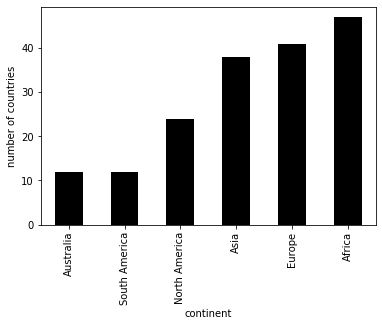

In [44]:
# plotting the number of countries by continent
ax = df.plot.bar(x="continent", y="number of countries", color='k', legend = False)
ax.set_xlabel('continent')
ax.set_ylabel("number of countries")

In [45]:
# total population of each continent
cont_pop = pd.read_sql("SELECT continent, CAST(SUM(population) AS float)/1000000 AS `total population (million)` FROM countries GROUP BY continent ORDER BY SUM(population) DESC", conn)
cont_pop

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0, 0.5, 'total population (million)')

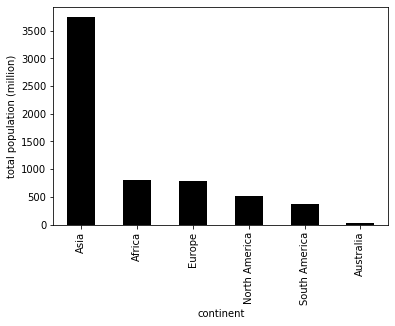

In [46]:
# plotting the total population of each continent
cont_pop_graph = cont_pop.plot.bar(x="continent", y="total population (million)", color='k', legend = False)
cont_pop_graph.set_xlabel('continent')
cont_pop_graph.set_ylabel("total population (million)")

In [47]:
# population of countries in South America
sam_pop = pd.read_sql("SELECT country, population FROM countries WHERE continent = 'South America' ORDER BY population DESC", conn)
sam_pop

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [48]:
# top ten countries based on GDP
real_gdp = pd.read_sql("SELECT country, CAST(population*`gdp-per-capita` AS float)/1000000000 AS `real GDP (billion)` FROM countries ORDER BY `real GDP (billion)` DESC LIMIT 10", conn)
real_gdp

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


Text(0, 0.5, 'real GDP (billion)')

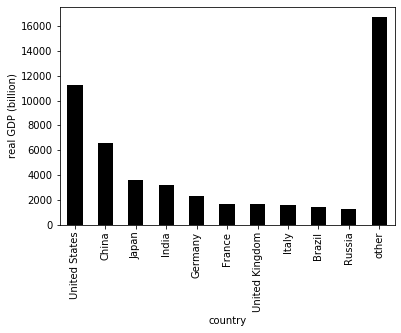

In [49]:
# plot of countries GDP
tot_gdp = pd.read_sql("SELECT country, CAST(population*`gdp-per-capita` AS float)/1000000000 AS `real GDP (billion)` FROM countries ORDER BY `real GDP (billion)` DESC", conn)
other_gdp = tot_gdp[10:]
for x in other_gdp:
    other_tot = sum(other_gdp['real GDP (billion)'])
    
data = {'country': ['other'],
       'real GDP (billion)': [other_tot]}
gdp_w_other = pd.concat([real_gdp, DataFrame(data)])

gdp_graph = gdp_w_other.plot.bar(x="country", y="real GDP (billion)", color='k', legend = False)
gdp_graph.set_xlabel('country')
gdp_graph.set_ylabel("real GDP (billion)")

In [50]:
# countries with the largest gap between birth and death rate
gap = pd.read_sql("SELECT country, `birth-rate`, `death-rate` FROM countries ORDER BY `birth-rate`-`death-rate` DESC LIMIT 15", conn)
gap

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5, 0, 'rate')

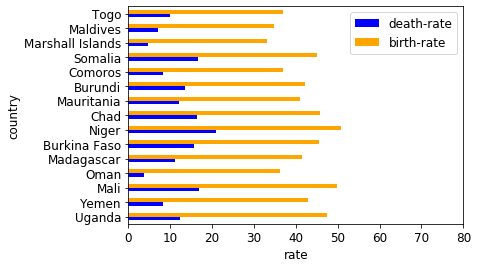

In [51]:
# plotting the countries with the largest gap between birth and death rate
matplotlib.rcParams["font.size"] = 12
gap_graph = gap.plot.barh(x="country", y = ["death-rate", "birth-rate"], color=['blue', 'orange'], legend = True) 
gap_graph.set_xlim(0, 80)
gap_graph.set_ylabel("country")
gap_graph.set_xlabel("rate")

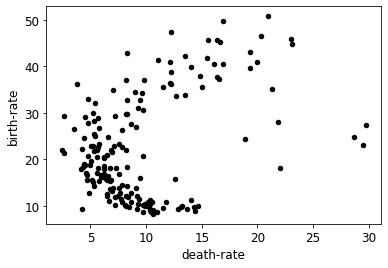

In [52]:
# relationships between birth and death rates
tot_gap = pd.read_sql("SELECT country, `birth-rate`, `death-rate` FROM countries ORDER BY `birth-rate`-`death-rate` DESC", conn)
gap_plot = tot_gap.plot.scatter(x='death-rate', y='birth-rate', c='k')

In [53]:
# identifying outliers in birth and death rate graphs
outliers = pd.read_sql("SELECT country, `birth-rate`, `death-rate` FROM countries WHERE `birth-rate` BETWEEN 15 AND 30 AND `death-rate` BETWEEN 17 AND 31 ORDER BY `death-rate` ASC", conn)
outliers

,country,birth-rate,death-rate
0,Namibia,24.32,18.86
1,Zimbabwe,28.01,21.84
2,South Africa,18.20,22.00
3,Lesotho,24.75,28.71
4,Botswana,23.08,29.50
5,Swaziland,27.41,29.74


In [54]:
# correlation between death rates and birth rates
tot_gap.corr().loc['birth-rate']['death-rate']

0.39650861177525115

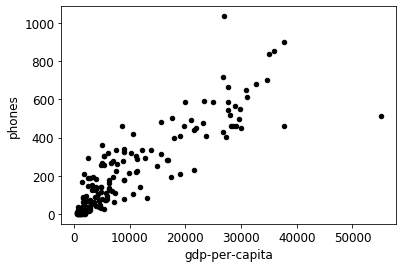

In [55]:
# relationship between GDP per capita and the number of phones per capita
phones_gdp = pd.read_sql("SELECT CAST(phones AS float) AS phones, `gdp-per-capita` FROM countries", conn)
phones_gdp.plot.scatter(x='gdp-per-capita', y='phones', c='k')

In [56]:
# correlation between GDP per capita and number of phones per capita
phones_gdp.corr()['phones']['gdp-per-capita']

0.8787244489303161

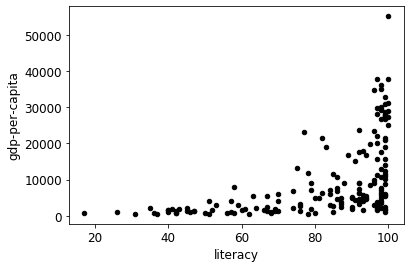

In [57]:
# relationship between literacy and GDP per capita
lit_gdp = pd.read_sql("SELECT CAST(literacy AS float) AS literacy, `gdp-per-capita` FROM countries", conn)
lit_gdp.plot.scatter(y='gdp-per-capita', x='literacy', c='k')

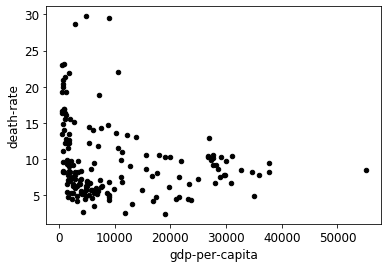

In [58]:
# relationship between GDP per capita and death rates
death_gdp = pd.read_sql("SELECT `death-rate`, `gdp-per-capita` FROM countries", conn)
death_gdp.plot.scatter(x='gdp-per-capita', y='death-rate', c='k')

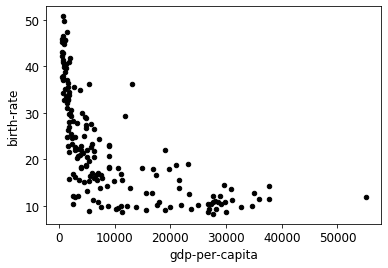

In [59]:
# relationship between GDP per capita and birth rates
birth_gdp = pd.read_sql("SELECT `birth-rate`, `gdp-per-capita` FROM countries", conn)
birth_gdp.plot.scatter(x='gdp-per-capita', y='birth-rate', c='k')

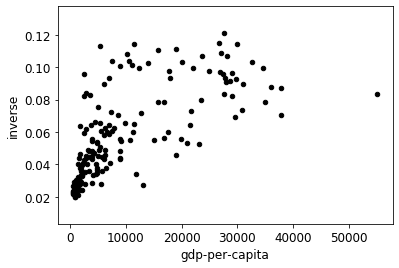

In [60]:
# relationship between GDP per capita and the inverse of birth rates
inv_birth_gdp = pd.read_sql("SELECT 1/`birth-rate` AS inverse, `gdp-per-capita` FROM countries", conn)
inv_birth_gdp.plot.scatter(x='gdp-per-capita', y='inverse', c='k')

In [61]:
# fitting a linear regression line to GDP per capita and the inverse of birth rates
inv_birth_gdp['1'] = 1
res = np.linalg.lstsq(inv_birth_gdp[["gdp-per-capita", "1"]], inv_birth_gdp["inverse"], rcond=None)
coefficients = res[0]
m = coefficients[0]
n = coefficients[1]

# coefficients of linear regression line
vals = (m, n)
vals

(1.8365703926233426e-06, 0.03916624252079354)

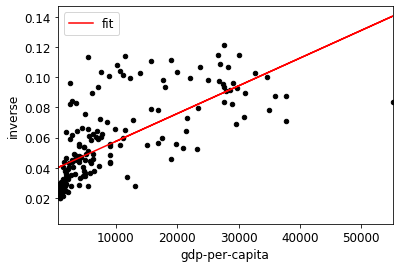

In [62]:
# plotting linear regression line with data
ax = inv_birth_gdp.plot.scatter(x='gdp-per-capita', y='inverse', c='k')

inv_birth_gdp["fit"] = inv_birth_gdp["gdp-per-capita"] * m + n
inv_birth_gdp.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [63]:
conn.close()